In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("insurance.csv")
df.shape

(1338, 7)

In [52]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## 데이터 전처리

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [55]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [56]:
# 성별 데이터 값 전환

df.loc[(df.sex == 'male'), 'sex'] = 1
df.loc[(df.sex == 'female'), 'sex'] = 0
df = df.astype({'sex':'int'})
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,yes,southwest,16884.9240
1,18,1,33.77,1,no,southeast,1725.5523


In [57]:
# 흡연 데이터 값 전환

df.loc[(df.smoker == 'yes'), 'smoker'] = 1
df.loc[(df.smoker == 'no'), 'smoker'] = 0
df = df.astype({'smoker':'int'})
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
1,18,1,33.77,1,0,southeast,1725.5523


## EDA

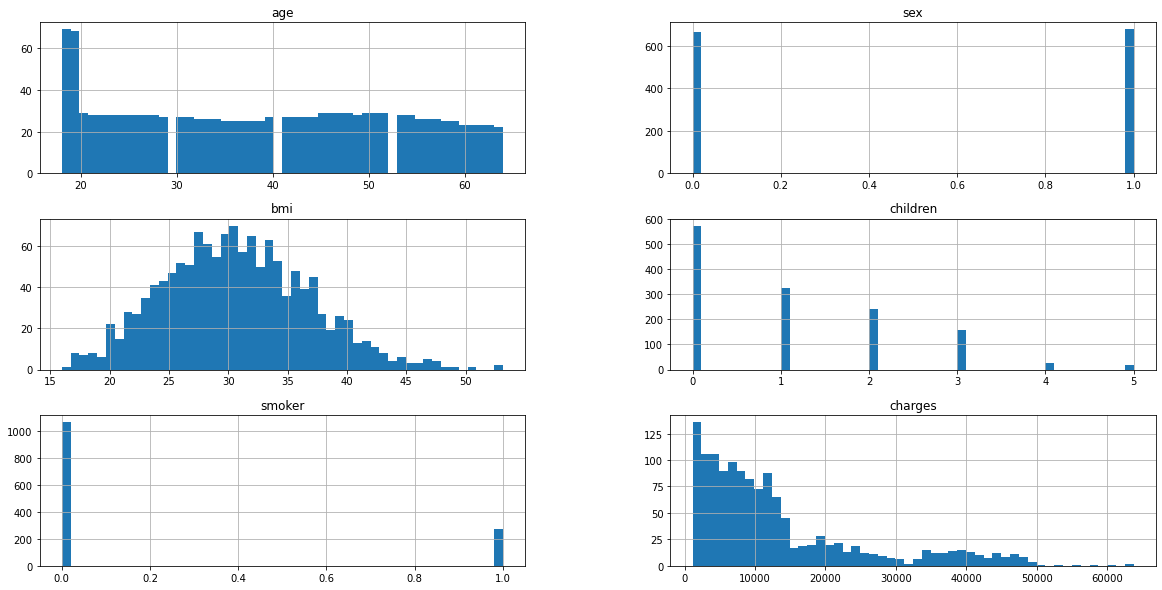

In [58]:
_ = df.hist(figsize=(20,10), bins=50)

<AxesSubplot:xlabel='age', ylabel='charges'>

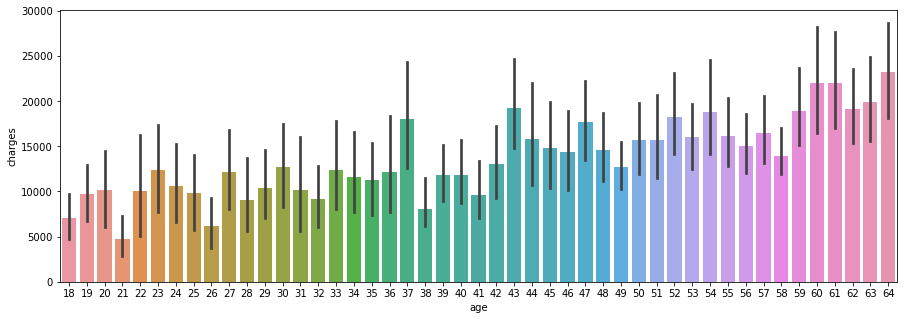

In [91]:
# 나이에 따른 보험료 막대그래프

plt.figure(figsize=(15,5))
sns.barplot(data=df, x="age", y="charges")

<AxesSubplot:xlabel='sex', ylabel='charges'>

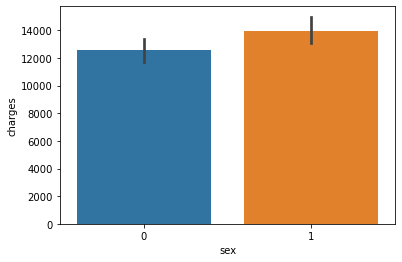

In [92]:
# 성별에 따른 보험료 막대그래프

sns.barplot(data=df, x="sex", y="charges")

<AxesSubplot:xlabel='children', ylabel='charges'>

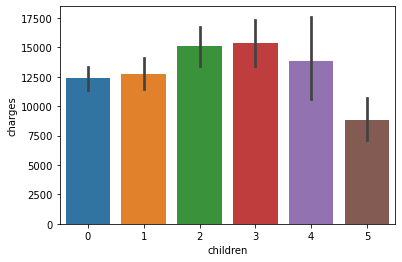

In [93]:
# 어린이 보험료

sns.barplot(data=df, x="children", y="charges")

<AxesSubplot:xlabel='charges', ylabel='Density'>

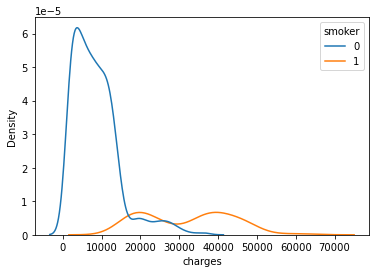

In [59]:
# 흡연 여부에 따른 보험료 kde플롯

sns.kdeplot(data=df, x="charges", hue="smoker")

<AxesSubplot:xlabel='age', ylabel='charges'>

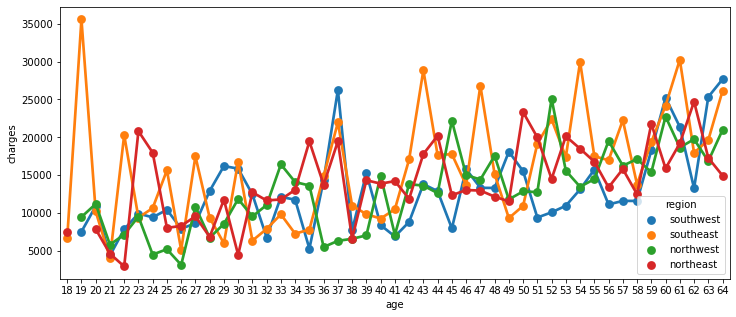

In [103]:
# 지역별 나이에 따른 보험료 포인트 플롯

plt.figure(figsize=(12,5))
sns.pointplot(data=df, x="age", y="charges", hue="region", ci=None)

<AxesSubplot:xlabel='age'>

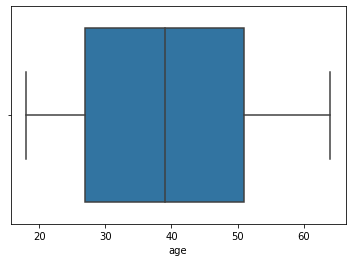

In [104]:
# 연령 박스 플롯

sns.boxplot(data=df, x='age')

<AxesSubplot:xlabel='bmi'>

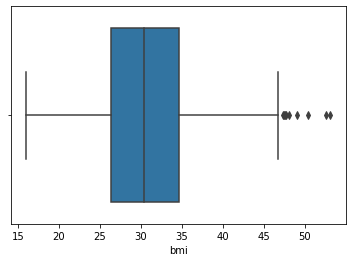

In [110]:
# bmi 박스 플롯

sns.boxplot(data=df, x='bmi')

<AxesSubplot:xlabel='sex', ylabel='charges'>

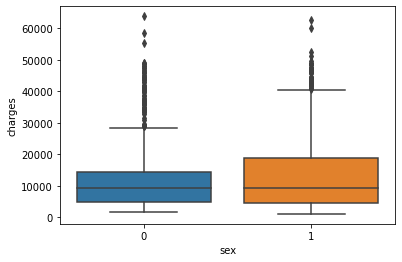

In [109]:
# 성별 보험료 박스 플롯

sns.boxplot(data=df, x=df['sex'], y=df["charges"])

<AxesSubplot:xlabel='region', ylabel='charges'>

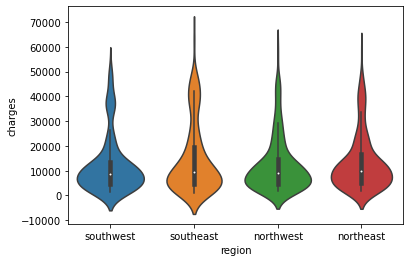

In [114]:
# 지역별 보험료 바이올린 플롯

sns.violinplot(y = df['charges'], x = df['region'])

<AxesSubplot:>

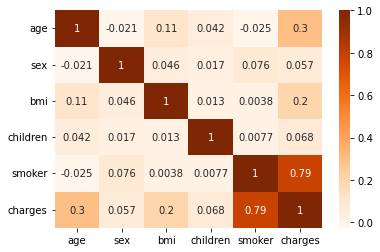

In [133]:
# 컬럼 간 상관계수 히트맵

sns.heatmap(df.corr(), annot = True, cmap = 'Oranges')

## 학습, 예측 데이터셋 나누기

In [60]:
# train 세트 설정
train = df[df["charges"] >= 9000]
train.shape

(690, 7)

In [61]:
# test 세트 설정
test = df[df["charges"] < 9000]
test.shape

(648, 7)

## 예측해야 하는 값 설정

In [62]:
label_name = "charges"
label_name

'charges'

## 학습, 예측에 사용할 컬럼 설정

In [63]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [64]:
feature_names = df.columns.tolist()
feature_names.remove(label_name)
feature_names.remove("region")
feature_names

['age', 'sex', 'bmi', 'children', 'smoker']

## 학습, 예측 데이터셋 만들기

In [65]:
# 학습 세트 만들기
X_train = train[feature_names]
X_train.shape

(690, 5)

In [66]:
# 정답값 만들기
y_train = train[label_name]
y_train.shape

(690,)

In [67]:
# 예측 데이터 세트 만들기
X_test = test[feature_names]
X_test.shape

(648, 5)

In [68]:
# 예측 정답값 만들기
y_test = test[label_name]
y_test.shape

(648,)